# The German Tank Problem
The numbers are taken from https://en.wikipedia.org/wiki/German_tank_problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np

max_tanks = 1500 # belief of maximum capacity
tanks = 271
captures = 10

serial_numbers = range(1, tanks+1)
captured_serials = np.random.choice(serial_numbers, captures, replace = False)

In [2]:
belief = np.repeat(1.0/max_tanks, max_tanks)

def normalize(belief):
    belief /= sum(belief)

def bayes_update(belief, serial):
    for i in range(max_tanks):
        assume_max = i+1
        if assume_max <= serial:
            belief[i] = 0.0 # not possible to have less tanks than an observed serial
            continue
        P_serial = 1.0/assume_max
        P_prior = belief[i]
        belief[i] = P_serial * P_prior
    normalize(belief)

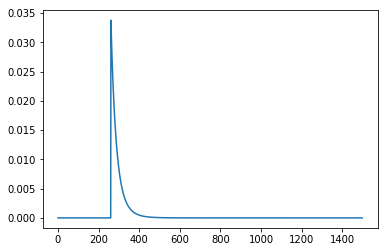

In [3]:
for s in captured_serials:
    bayes_update(belief, s)
    
plt.plot(belief)
plt.show()

In [4]:
def expected(b):
    E = 0.0
    for i in range(max_tanks):
        E += b[i] * (i+1)
    return E

print(expected(belief))

294.190519739


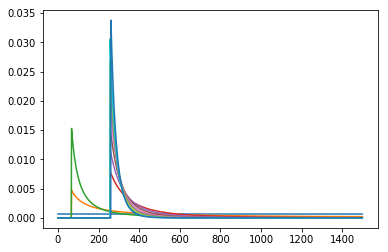

In [5]:
# Reset the belief to a uniform distribution
belief = np.repeat(1.0/max_tanks, max_tanks)

# Plot belief in every iteration
for s in captured_serials:
    normalize(belief)
    plt.plot(belief)
    bayes_update(belief, s)
plt.plot(belief)
plt.show()